# Python Histogram Visuals

## Video 2: Using pure python

In [1]:
a = [0,1,1,1,2,3,7,7,23]

In [2]:
# Make a function to count number of times each element appears
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
        
    return hist

In [3]:
counted = count_elements(a)
counted

{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

In [6]:
# the collections library does the same thing
from collections import Counter
recounted = Counter(a)
recounted # sorted from most occuring to least occuring

Counter({1: 3, 7: 2, 0: 1, 2: 1, 3: 1, 23: 1})

In [8]:
print(recounted.items() == counted.items())

True


In [26]:
# Really we want to create a visual though
def ascii_histogram(seq) -> None:
    counted = count_elements(seq)
    for k in sorted(counted):
        print(f'{k} {"+" * counted[k]}')

In [27]:
# creating data to put into our ascii_histogram() function
import random
random.seed(1)
vals = [1, 3, 4, 6, 8, 9, 10]
freq = [random.randint(5, 15) for _ in vals]

data = []

for f, v in zip(freq, vals):
    data.extend([v]*f)
    
ascii_histogram(data)

1 +++++++
3 ++++++++++++++
4 ++++++
6 +++++++++
8 ++++++
9 ++++++++++++
10 ++++++++++++


## Video 3: NumPy Histograms

typically we have to define bins to make histograms. This can be done using numbpy.

By default NumPy creates 10 bins where the start of the first bin is the minimum of the dataset. The end of the last bin the max of the dataset. The lower bound is inclusive and the upper bound in exclusive [, ). The exception is the final bin which is [, ]

In [31]:
import numpy as np

np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15, scale=3, size=500)

hist, bin_edges = np.histogram(d)
print(hist) # number of occurences
print()
print(bin_edges)# show where bin edges are. Numpy ranges are [, )

[ 13  23  91 261  80  21   7   2   1   1]

[ 2.11   5.874  9.638 13.402 17.166 20.93  24.694 28.458 32.222 35.986
 39.749]


## Video 4: Matplotlib and Pandas

This video we will actually plot a histogram

(0.0, 80.0)

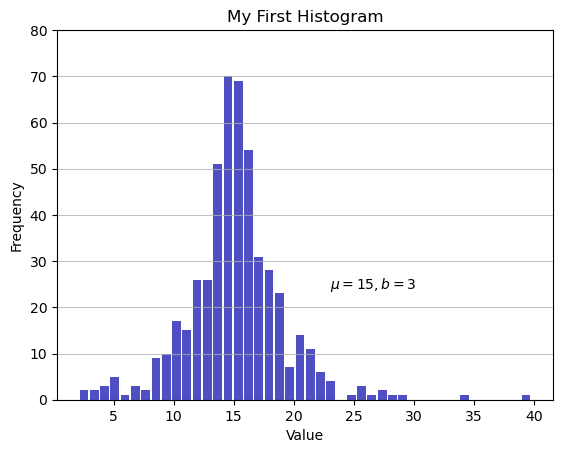

In [35]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My First Histogram')
plt.text(23, 24, r'$\mu=15, b=3$')
maxfreq=n.max()
plt.ylim(top=np.ceil(maxfreq/10) * 10 if maxfreq %10 else maxfreq + 10)


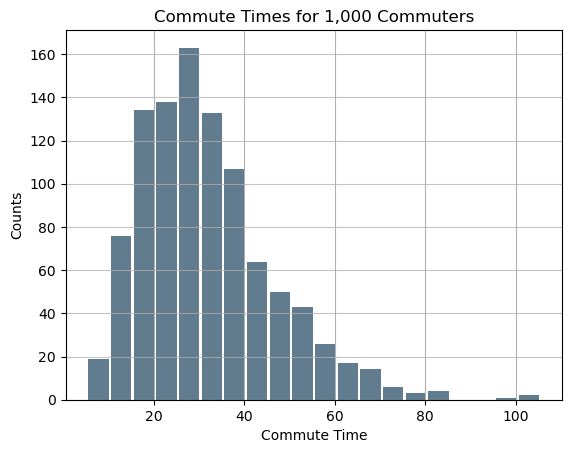

In [38]:
import pandas as pd

size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.ylabel('Counts')
plt.xlabel('Commute Time')
plt.grid(axis='y', alpha=0.75)